## <strong>Proyecto: Concentración de PM2.5 en Pekín y su relación con otras variables meteorológicas.</strong>

##<strong> 1. Introducción </strong>

## 1. Pregunta de investigación

En Pekín, la contaminación atmosférica por material particulado fino (PM₂.₅) es un problema de gran magnitud con implicaciones directas para la salud y el medio ambiente.  
La pregunta central que guiará este análisis es:  

**_“¿Cuál es la influencia relativa de las condiciones meteorológicas (temperatura, presión, punto de rocío, dirección del viento y precipitación) en la severidad y clasificación de los estados de PM2.5?”_**


## 2. Contexto:

La identificación de eventos de concentraciones altas de PM₂.₅ es importante debido a varios factores:
- El PM₂.₅(partículas con diámetro ≤ 2,5 µm) penetra profundamente en el sistema respiratorio, provocando o agravando enfermedades respiratorias y cardiovasculares.  
- Pekín combina factores de alta emisión (tráfico, industria, uso de carbón en calefacción) con condiciones meteorológicas que pueden favorecer la acumulación de contaminantes.  
- Analizar la influencia de variables climáticas como temperatura, punto de rocío, presión atmosférica, dirección del viento, y ocurrencia de precipitación sólida o líquida permite distinguir variaciones debidas a cambios meteorológicos de aquellas provocadas por modificaciones en las emisiones.  
- Esta distinción es esencial para diseñar políticas ambientales efectivas y evaluar el impacto real de medidas temporales (ej. APEC 2014) o estacionales (calefacción invernal).


## 3. Relación entre el problema y la base de datos seleccionada
Las variables permiten:
- Describir la evolución temporal del PM₂.₅.  
- Explorar cómo distintos factores meteorológicos están asociados a cambios en la concentración de partículas.  
- Comparar períodos o eventos específicos controlados por condiciones climáticas.

# <strong> 2. Librerías y Datos </strong>


Importación de librerías

In [184]:
#Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from google.colab import drive
import os
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importación de datos

In [185]:
path = '/content/drive/My Drive/'
folder = 'intro_cienciadatos/dataset/'
file = 'PRSA_data_2010.1.1-2014.12.31.csv'

df_original = pd.read_csv(path + folder + file)
df = df_original.copy()

# Descripción de la base de datos

El dataset original incluye mediciones horarias de:

| Variable  | Nombre y Unidades | Rango típico | Descripción | Tipo de variable |
|-----------|-------------|------------------|---------------|------------------|
| **pm2.5** | Concentración de PM₂.₅ (µg/m³) | 0 a 500µg/m³  | Material Particulado Fino. Mide la concentración de partículas en el aire con un diámetro aerodinámico de 2.5 micrómetros o menos. | Continua, cuantitativa |
| **DEWP**  | Punto de rocío (℃) | -30 a 30°C |La temperatura a la que el aire debe enfriarse, a presión constante, para que el vapor de agua se sature y comience la condensación (formación de rocío o niebla). Es una medida directa del contenido de humedad. | Continua, cuantitativa |
| **TEMP**  | Temperatura (℃) | -15 a +40 °C | Medida de la energía térmica del aire. Indica qué tan caliente o frío está el . | Continua, cuantitativa |
| **PRES**  | Presión atmosférica (hPa) | 990 a 1040 hPa | El peso o la fuerza que ejerce el aire sobre una superficie debido a la gravedad. Los cambios indican la aproximación de sistemas meteorológicos (altas o bajas presiones).| Continua, cuantitativa |
| **cbwd**  | Dirección combinada del viento. | NW, SW, NE, SE, N, S, E, W, cv | El origen geográfico (de dónde viene) del viento predominante. | Categórica, discreta|
| **Iws**   | Potencia acumulada del viento |W/m²| Mide la energía total contenida en el viento, no solo su velocidad. | Continua, cuantitativa |
| **Is**    | Horas acumulada de nieve (h) |-| El tiempo total (en horas) durante el cual se ha observado precipitación en forma sólida (nieve) en un evento de precipitación. | Continua, cuantitativa |
| **Ir**    | Horas acumuladas de lluvia (h)  |-| El tiempo total (en horas) durante el cual se ha observado precipitación en forma líquida (lluvia) en un evento de precipitación. | Continua, cuantitativa |


Visualización de la estructura del Dataset

In [186]:
df_original.head(4000)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,2010,6,16,11,95.0,18,28.0,1000.0,SE,10.28,0,0
3996,3997,2010,6,16,12,109.0,18,30.0,1000.0,NE,3.13,0,0
3997,3998,2010,6,16,13,120.0,19,31.0,999.0,SE,4.92,0,0
3998,3999,2010,6,16,14,125.0,20,30.0,998.0,SE,9.84,0,0


# <strong> 3. Análisis exploratorio de las variables </strong>


Las variables 'Iws, 'Is' e 'Ir' se presentan de manera acumulada.
- Iws representa la potencia acumulada del viento, y este valor se acumula hasta que este cambia de dirección. La duración de Iws está inherentemente ligada a la estabilidad de la categoría en cbwd. Si cbwd no cambia, Iws aumenta.
- Is e Ir representan las horas acumuladas de precipitacion de nieve y lluvia respectivamente y estas también reinician el conteo cuando el evento cesa.

A partir de estas variables continuas, se crearán dos columnas donde se presenten como variables categóricas (ocurrencia/no ocurrencia) para cada tipo de precipitación.




Según la norma estadounidense (EPA), 35 µg/m³ (la Unión Europea utiliza 25 µg/m³) es el nivel más alto de PM2,5 para una calidad del aire aceptable, mientras que 150 µg/m³ se considera ampliamente como muy insalubre e incluso peligroso.
Los estados de polución pueden así, clasificarse en 3 tipos:
- Baja polución cuando la concentración de PM₂.₅ es menor o igual a 35 µg/m³.
- Evento de polución cuando la concentración de PM₂.₅ es mayor a 35 y menor o igual a 150 µg/m³.
- Alta polución cuando la concentración de PM₂.₅ es mayor a 150 µg/m³.

Se generará una variable donde se clasifica la concentración de PM2.5 de manera categórica dentro de estos 3 grupos.

Las variables de temperatura, punto de rocío, presión atmosférica, dirección combinada del viento, velocidad acumulada del viento y ocurrencia de precipitación serán relacionadas con la concentración de PM2.5 tanto en su forma de variable continua como de variable categórica.

<strong>Creación de variables categóricas</strong>

In [187]:
# Crear dos columnas nuevas categóricas para eliminar 'Is' e 'Ir'
df['snow'] = np.where(df['Is'] > 0, 'si', 'no')
df['rain'] = np.where(df['Ir'] > 0, 'si', 'no')
# De esta manera que no se mostrará el valor numérico de horas acumuladas de nieve o lluvia sino la presencia o no de precipitación
#Eliminar columnas
columnas_a_eliminar = ['Is', 'Ir'] # Lista de columnas a eliminar
df.drop(columns=columnas_a_eliminar, inplace=True) # Elimina las columnas del DataFrame 'df'

#Crear columna categórica de estado de PM2.5 clasificando 3 eventos diferentes: Baja Polución (BP), Episodio de Polución (EP), Alta Polución (AP#)
#Función para clasificar eventos de polucion
def classify_pm(value):
    if pd.isna(value):
        return np.nan
    elif value <= 35:
        return 'Baja Polución'
    elif value > 150:
        return 'Alta Polución'
    else:
        return 'Episodio de Polución'
df['pm_state'] = df['pm2.5'].apply(classify_pm) # Crear la nueva columna categórica

# Verificar cambios
df.head(4000)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,snow,rain,pm_state
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,no,no,NaN
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,no,no,NaN
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,no,no,NaN
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,no,no,NaN
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,no,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,2010,6,16,11,95.0,18,28.0,1000.0,SE,10.28,no,no,Episodio de Polución
3996,3997,2010,6,16,12,109.0,18,30.0,1000.0,NE,3.13,no,no,Episodio de Polución
3997,3998,2010,6,16,13,120.0,19,31.0,999.0,SE,4.92,no,no,Episodio de Polución
3998,3999,2010,6,16,14,125.0,20,30.0,998.0,SE,9.84,no,no,Episodio de Polución


In [188]:
#Exportar archivo .csv a carpeta de Drive
nombre_archivo = 'pm25_dataset_limpio.csv'
output_file = os.path.join(path, folder, nombre_archivo)
# Guardar DataFrame en archivo CSV
df.to_csv(output_file, index=False, encoding='utf-8')

In [189]:
print("🔶 Resumen de variables:")
# Número de registros y variables
print(f"\nNúmero de registros: {df.shape[0]}")

# Clasificación de variables
categoricas = df.select_dtypes(include=['object']).columns.tolist()
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\n🔹 Variables categóricas:")
print(categoricas)
# Mostrar los valores únicos de la variable categórica
print("\n📍 Valores únicos de dirección combinada del viento:")
print(df['cbwd'].unique())
print("*Nota: cv (calm variable) indica condiciones de viento calmadas o estacionarias")
print("Valores únicos de nieve/lluvia:")
print(df['snow'].unique())
print("Valores únicos de estado de concentración de PM2.5 :")
print(df['pm_state'].unique())

print("\n🔹 Variables numéricas:")
cols_to_exclude = ['No', 'year', 'month', 'day', 'hour'] #Excluir columnas de fecha de las variables numéricas
numericas= [col for col in numericas if col not in cols_to_exclude]
print(numericas)

# Descripción general
print("\n📊 Descripción estadística de variables numéricas:")
print(df[numericas].describe())

#  Conteo de valores faltantes ordenado de mayor a menor
faltantes = df.isnull().sum().sort_values(ascending=False)

print("\n❗ Conteo de valores faltantes por variable:")
print(faltantes[faltantes > 0])  # Solo muestra variables con al menos un valor faltante
porcentaje_pm25 = df['pm2.5'].isna().mean() * 100
print(f"Porcentaje de faltantes: {porcentaje_pm25:.2f}%")

🔶 Resumen de variables:

Número de registros: 43824

🔹 Variables categóricas:
['cbwd', 'snow', 'rain', 'pm_state']

📍 Valores únicos de dirección combinada del viento:
['NW' 'cv' 'NE' 'SE']
*Nota: cv (calm variable) indica condiciones de viento calmadas o estacionarias
Valores únicos de nieve/lluvia:
['no' 'si']
Valores únicos de estado de concentración de PM2.5 :
[nan 'Episodio de Polución' 'Alta Polución' 'Baja Polución']

🔹 Variables numéricas:
['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws']

📊 Descripción estadística de variables numéricas:
              pm2.5          DEWP          TEMP          PRES           Iws
count  41757.000000  43824.000000  43824.000000  43824.000000  43824.000000
mean      98.613215      1.817246     12.448521   1016.447654     23.889140
std       92.050387     14.433440     12.198613     10.268698     50.010635
min        0.000000    -40.000000    -19.000000    991.000000      0.450000
25%       29.000000    -10.000000      2.000000   1008.000000      1.790000


## <strong> Visualizaciones exploratorias básicas </strong>

In [190]:
#Añadir formato datetime para graficar
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

## Gráficas exploratorias para la variable principal (PM2.5)

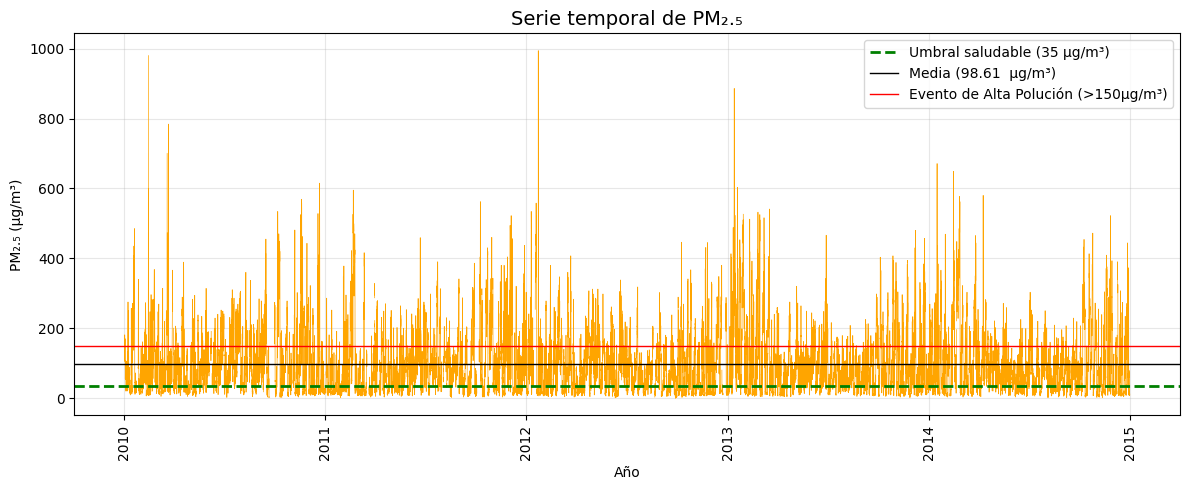

In [191]:
#Serie temporal de pm2.5
plt.figure(figsize=(12, 5))
plt.plot(df['datetime'], df['pm2.5'], color='orange', linewidth=0.5)
plt.axhline(y=35, color='green', linestyle='--', linewidth=2, label='Umbral saludable (35 µg/m³)')
plt.axhline(y= 98.613215, color='black', linestyle='-', linewidth=1, label='Media (98.61  µg/m³)')
plt.axhline(y=150, color='red', linestyle='-', linewidth=1, label='Evento de Alta Polución (>150µg/m³)')
plt.title('Serie temporal de PM₂.₅', fontsize=14)
plt.xlabel('Año')
plt.ylabel('PM₂.₅ (µg/m³)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

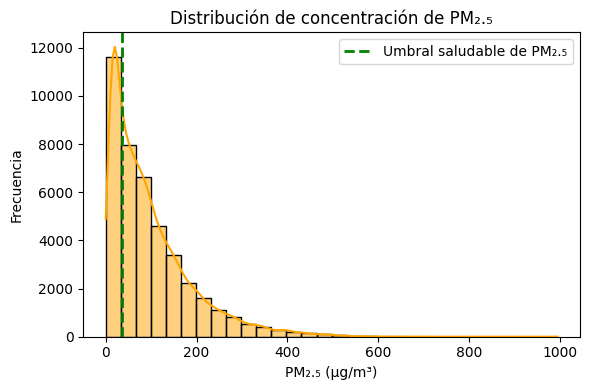

In [192]:
# Histogramas para cada variable
plt.figure(figsize=(6,4))
sns.histplot(df['pm2.5'], bins=30, kde=True, color='orange')
plt.axvline(x=35, color='green', linestyle='--', linewidth=2, label='Umbral saludable de PM₂.₅')
plt.legend()
plt.title('Distribución de concentración de PM₂.₅')
plt.xlabel('PM₂.₅ (µg/m³)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

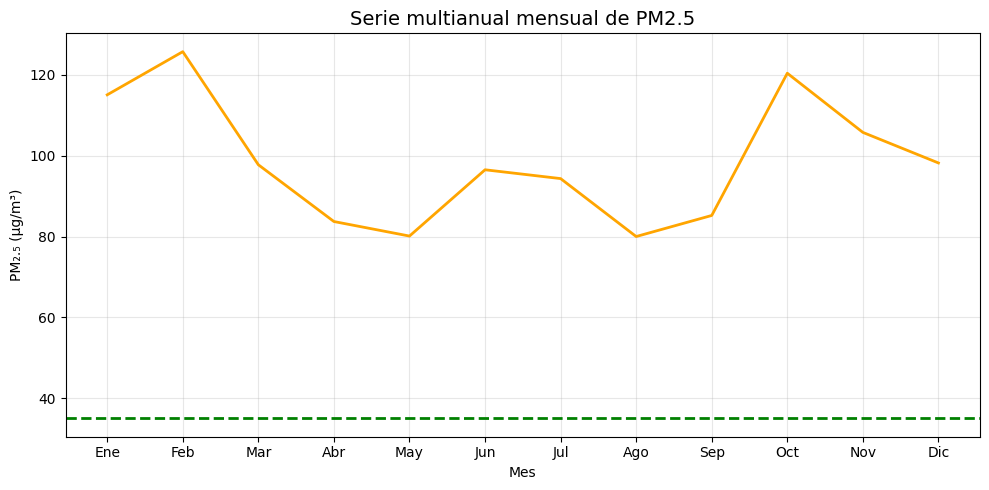

In [193]:
#Serie multianual mensual
pm_por_mes = df.groupby('month')['pm2.5'].mean().reset_index() # Calcular promedio de PM2.5 por mes (agregando todos los años)
meses = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']

plt.figure(figsize=(10, 5))
plt.plot(pm_por_mes['month'], pm_por_mes['pm2.5'], color='orange', linewidth=2)
plt.axhline(y=35, color='green', linestyle='--', linewidth=2, label='Umbral saludable (35 µg/m³)')
plt.title('Serie multianual mensual de PM2.5', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('PM₂.₅ (µg/m³)')
plt.xticks(ticks=range(1,13), labels=meses)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

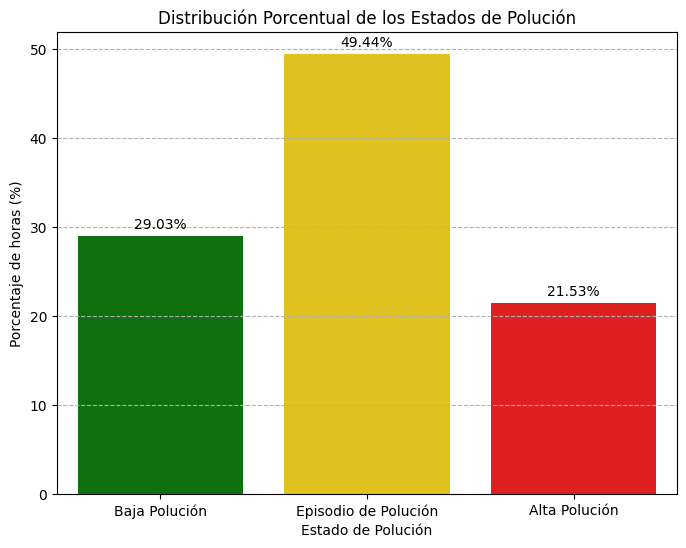

In [194]:
plt.figure(figsize=(8, 6))

# Porcentajes
pm_state_counts = df['pm_state'].value_counts(normalize=True) * 100
pm_state_counts = pm_state_counts.reindex(['Baja Polución', 'Episodio de Polución', 'Alta Polución'])
colours = {'Baja Polución': 'green', 'Episodio de Polución': 'gold', 'Alta Polución': 'red'}

bars = sns.barplot(
    x=pm_state_counts.index,    # Estados de polución
    y=pm_state_counts.values,   # Porcentajes
    hue=pm_state_counts.index,
    palette=colours,
    legend=False
)

for bar in bars.patches: # Etiquetas de porcentaje sobre cada barra
    height = bar.get_height()
    bars.annotate(
        f'{height:.2f}%',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Distribución Porcentual de los Estados de Polución')
plt.ylabel('Porcentaje de horas (%)')
plt.xlabel('Estado de Polución')
plt.grid(axis='y', linestyle='--')
plt.show()

A lo largo de los cinco años analizados, se observa que gran parte de los valores de concentración de PM₂.₅ superan el umbral considerado saludable. Es común que se alcancen niveles clasificados como de alta polución, lo cual evidencia una persistente afectación en la calidad del aire. Asimismo, se identifican posibles ciclos anuales, donde las concentraciones máximas tienden a presentarse al final de cada año o al inicio del siguiente, mientras que los valores mínimos suelen registrarse a mitad de año.
En particular, durante los meses de febrero y octubre se evidencian las mayores concentraciones de PM₂.₅, mientras que en mayo y agosto se presentan los valores más bajos. Cabe destacar que la media mensual de todos los meses se mantiene por encima del umbral saludable, lo que sugiere una exposición continua a niveles de contaminación perjudiciales.

Por otro lado, los datos no siguen una distribución normal, sino que presentan asimetría positiva (hacia la derecha), lo que indica que los valores extremadamente altos de concentración (por encima de 200 µg/m³) son menos frecuentes, aunque sí se registran de forma ocasional.

En cuanto a la frecuencia de los estados de polución, cerca del 50 % de las horas analizadas durante el periodo de estudio corresponden a un evento de polución (con concentraciones superiores a 35 µg/m³). Los episodios de alta polución representan un porcentaje menor en comparación con los de baja polución, con una diferencia de aproximadamente 7.5 % entre ambos estados.

## Gráficas exploratorias relacionando la variable principal con las otras variables

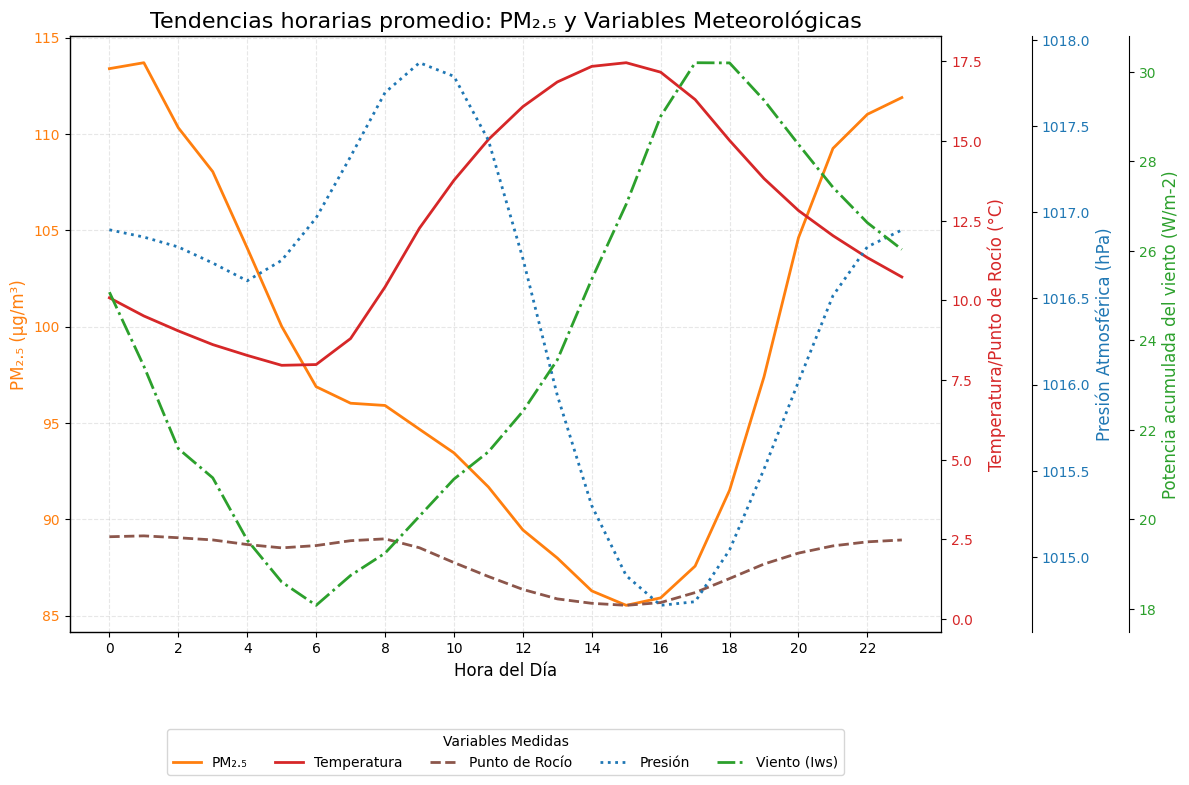

In [195]:
# Calcular los promedios horarios para las variables continuas
variables = ['pm2.5', 'TEMP', 'DEWP', 'PRES', 'Iws']
promedios_hora = df.groupby('hour')[variables].mean()

# Series de promedios diarios
pm25_promedio = promedios_hora['pm2.5']
temp_promedio = promedios_hora['TEMP']
dewp_promedio = promedios_hora['DEWP']
pres_promedio = promedios_hora['PRES']
iws_promedio = promedios_hora['Iws']

horas = promedios_hora.index

# Configurar 4 twin axes
fig, ax1 = plt.subplots(figsize=(12, 7))
# Eje Y1 (ax1): Concentración de PM₂.₅ (Eje Principal a la izquierda)
color_pm25 = 'tab:orange'
ax1.set_xlabel('Hora del Día', fontsize=12)
ax1.set_ylabel('PM₂.₅ (µg/m³)', color=color_pm25, fontsize=12)
ax1.plot(horas, pm25_promedio, color=color_pm25, linewidth=2, label='PM₂.₅')
ax1.tick_params(axis='y', labelcolor=color_pm25)
ax1.grid(alpha=0.3, linestyle='--')

#Eje Y2 (ax2): Temperatura y Punto de Rocío (A la derecha)
ax2 = ax1.twinx()
color_temp = 'tab:red'
ax2.set_ylabel('Temperatura/Punto de Rocío (°C)', color=color_temp, fontsize=12)
ax2.plot(horas, temp_promedio, color='tab:red', linestyle='-', linewidth=2, label='Temperatura')
ax2.plot(horas, dewp_promedio, color='tab:brown', linestyle='--', linewidth=2, label='Punto de Rocío')
ax2.tick_params(axis='y', labelcolor=color_temp)

# Eje Y3 (ax3): Presión Atmosférica (A la derecha)
ax3 = ax1.twinx()
color_pres = 'tab:blue'
ax3.spines['right'].set_position(('outward', 65)) #Evitar superposición con ax2
ax3.set_ylabel('Presión Atmosférica (hPa)', color=color_pres, fontsize=12)
ax3.plot(horas, pres_promedio, color=color_pres, linestyle=':', linewidth=2, label='Presión')
ax3.tick_params(axis='y', labelcolor=color_pres)

# Eje Y 4 (ax4): Velocidad Acumulada del Viento (A la derecha)
ax4 = ax1.twinx()
color_iws = 'tab:green'
ax4.spines['right'].set_position(('outward', 135))
ax4.set_ylabel('Potencia acumulada del viento (W/m-2)', color=color_iws, fontsize=12)
ax4.plot(horas, iws_promedio, color=color_iws, linestyle='-.', linewidth=2, label='Viento (Iws)')
ax4.tick_params(axis='y', labelcolor=color_iws)
plt.title('Tendencias horarias promedio: PM₂.₅ y Variables Meteorológicas', fontsize=16)
ax1.set_xticks(range(0, 24, 2)) # cada 2 horas
fig.tight_layout()
lines_ax1, labels_ax1 = ax1.get_legend_handles_labels()
lines_ax2, labels_ax2 = ax2.get_legend_handles_labels()
lines_ax3, labels_ax3 = ax3.get_legend_handles_labels()
lines_ax4, labels_ax4 = ax4.get_legend_handles_labels()
ax1.legend(lines_ax1 + lines_ax2 + lines_ax3 + lines_ax4, labels_ax1 + labels_ax2 + labels_ax3 + labels_ax4, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, title='Variables Medidas')
plt.show()

**PM₂.₅**

Se logran evidenciar valores altos en la noche entre las 0–6 h; los valores de PM₂.₅ son elevados al inicio del día, es un comportamiento común asociado a la estabilidad atmosférica durante la noche, donde hay poca mezcla del aire, baja turbulencia y menor dispersión de contaminantes. Hay un descenso entre las 6–14; conforme aumenta la temperatura y el viento, la atmósfera se vuelve más inestable y se dispersan las partículas. Por último, se nota un aumento nocturno después de las 18 h; al caer la temperatura y disminuir el viento, los contaminantes vuelven a acumularse cerca del suelo.


**Temperatura y punto de rocío**

La temperatura muestra el patrón típico diario mínimo en la madrugada y máximo hacia las 14–16 h. El punto de rocío se mantiene bajo y bastante estable, con un ligero aumento nocturno, lo que indica mayor humedad relativa en la noche.


**Presión atmosférica**

Muestra una ligera caída entre las 8 h y 16 h, coincidiendo con el aumento térmico. Este comportamiento es coherente ya que el aire caliente se expande y reduce la presión local. La presión vuelve a aumentar en la noche, cuando la atmósfera se enfría y se densifica.


**Velocidad del viento**

Presenta un mínimo temprano (6–8 h) y un máximo en la tarde (14–18 h).
Esto coincide con la mayor convección y calentamiento solar, que generan movimientos verticales y horizontales del aire.


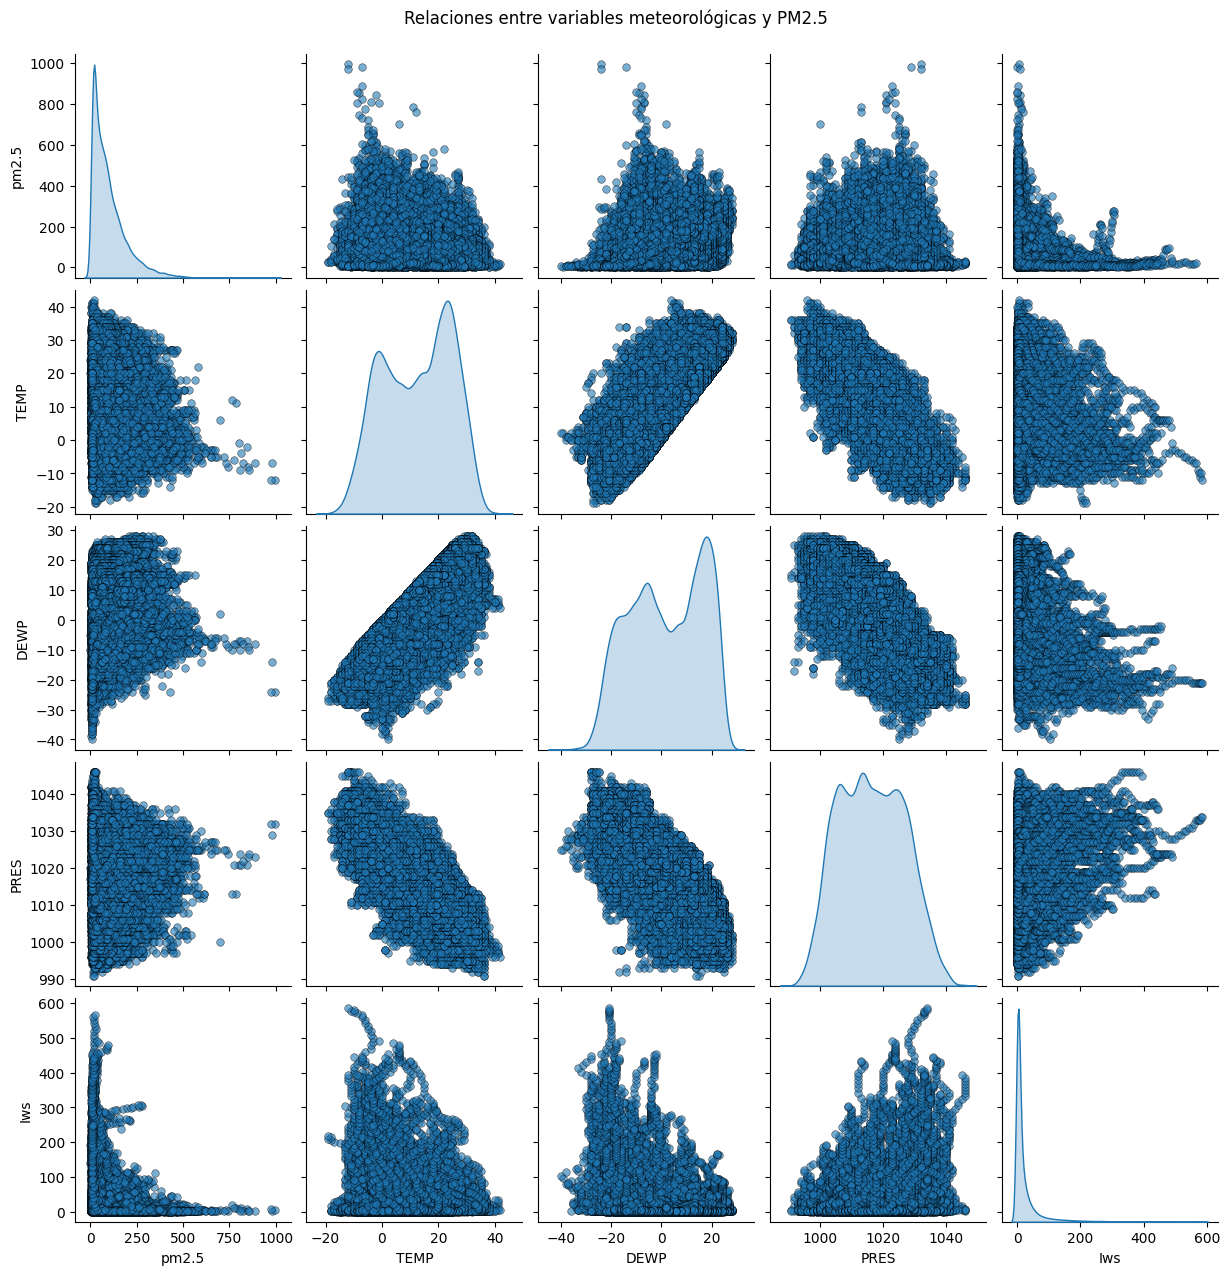

In [196]:
# Filtrar solo las columnas de interés
df_subset = df[variables]

# Crear el pairplot
sns.pairplot(df_subset, diag_kind='kde', plot_kws={'alpha':0.6, 's':30, 'edgecolor':'k'})

# Mostrar la gráfica
plt.suptitle('Relaciones entre variables meteorológicas y PM2.5', y=1.02)
plt.show()

**PM2.5 vs Temperatura**

No se evidencia una correlación fuerte entre la concentración de PM2.5 y la temperatura; sin embargo, pueden identificarse valores más altos de PM2.5 en el rango de temperatura entre –10 °C y 0 °C, lo cual podría estar asociado a condiciones invernales. Este comportamiento sugiere la conveniencia de analizar con mayor detalle las temporadas frías, particularmente en relación con la ocurrencia de precipitación en forma de nieve y la estabilidad atmosférica que puede limitar la dispersión de contaminantes.
También se observa una ligera disminución en los valores de PM2.5 a medida que la temperatura aumenta, lo que podría indicar que durante los periodos cálidos o de verano, la mezcla vertical y la mayor turbulencia atmosférica favorecen la dispersión del material particulado y reducen su acumulación en las capas bajas de la atmósfera.


**PM2.5 vs Punto de rocío**

El patrón de PM2.5 frente al punto de rocío es similar al observado con la temperatura. El punto de rocío representa la temperatura a la cual el aire debe enfriarse para que el vapor de agua que contiene se condense, por lo tanto, está estrechamente ligado a la temperatura y a la humedad relativa.
A medida que la temperatura aumenta, el aire puede contener más vapor de agua, y si la humedad se mantiene constante, también aumenta el punto de rocío. Esto explica la tendencia lineal ascendente observada entre la temperatura y el punto de rocío, reflejando la coherencia física entre ambas variables.
En relación con el PM2.5, los valores más altos suelen presentarse en condiciones de baja humedad (puntos de rocío bajos), lo que puede favorecer la acumulación de partículas secas en suspensión, mientras que una mayor humedad podría contribuir a la coagulación o sedimentación del material particulado.


**PM2.5 vs Presión atmosférica**

La presión atmosférica muestra una relación ligeramente positiva con el PM2.5, evidenciándose un pequeño incremento de las concentraciones entre 1020 y 1040 hPa. Esto puede deberse a que las altas presiones se asocian con condiciones anticiclónicas, caracterizadas por aire descendente, estabilidad y baja ventilación, lo cual limita la dispersión de contaminantes.
Asimismo, la relación entre la presión y la temperatura/punto de rocío es negativa: cuando la presión atmosférica disminuye, el aire tiende a ascender, expandirse y enfriarse, aumentando la humedad relativa y el punto de rocío. En cambio, con presiones altas, el aire desciende, se comprime y calienta, reduciendo la humedad y, por ende, el punto de rocío.
Este comportamiento confirma que la presión actúa como un indicador indirecto de la estabilidad atmosférica y puede influir significativamente en la acumulación o dispersión del material particulado.


**PM2.5 vs Potencia del viento (Iws)**

La relación entre la potencia acumulada del viento y las concentraciones de PM2.5 es claramente inversa. A bajas velocidades del viento, las concentraciones de PM2.5 son más altas y dispersas, mientras que a mayores velocidades, las concentraciones disminuyen drásticamente. Esto sugiere que el viento actúa como un agente dispersor del material particulado, favoreciendo la dilución y el transporte del contaminante hacia otras zonas.
En condiciones de calma atmosférica, en cambio, el PM2.5 tiende a acumularse cerca del suelo debido a la falta de movimiento del aire, lo que eleva los niveles de contaminación.
Por otra parte, la relación de la potencia del viento con la temperatura (que se relaciona directamente con la velocidad del viento) y el punto de rocío es ligeramente descendente, mientras que con la presión atmosférica es ascendente. Este comportamiento es consistente con la dinámica atmosférica: presiones bajas suelen asociarse con mayor movimiento del aire, mientras que altas presiones y temperaturas elevadas favorecen la estabilidad y reducen la ventilación


| Variable                      | Comportamiento observado | Relación con PM₂.₅ | Interpretación |
|-------------------------------|---------------------------|--------------------|-------------------------------------------|
| **Temperatura**        | Mínima en la madrugada (0–6 h) y máxima hacia las 14–16 h. | Relación **ligeramente negativa**. A menor temperatura (–10 °C a 0 °C), se observan concentraciones más altas. | Las bajas temperaturas (invierno) generan estabilidad atmosférica y menor dispersión; en verano, la turbulencia y convección reducen el PM₂.₅. |
| **Punto de rocío**     | Bajo y estable durante el día, con ligero aumento nocturno. | Relación **similar a la temperatura**: mayor PM₂.₅ con puntos de rocío bajos. | Puntos de rocío bajos implican aire seco, lo que favorece la suspensión de partículas; con alta humedad, las partículas se aglomeran o sedimentan. |
| **Presión atmosférica**| Disminuye entre 8 h y 16 h, aumenta en la noche. | Relación **positiva débil**: PM₂.₅ más alto entre 1020–1040 hPa. | Alta presión indica condiciones anticiclónicas (estables, sin mezcla vertical) que limitan la dispersión; bajas presiones favorecen el movimiento ascendente y la ventilación. |
| **Velocidad del viento**| Mínima entre 6–8 h, máxima entre 14–18 h. | Relación **inversa fuerte**: altas concentraciones de PM₂.₅ a bajas velocidades del viento. | El viento puede estar actuando como un agente **dispersor** del material particulado; en calma atmosférica se acumula PM₂.₅ cerca del suelo. |

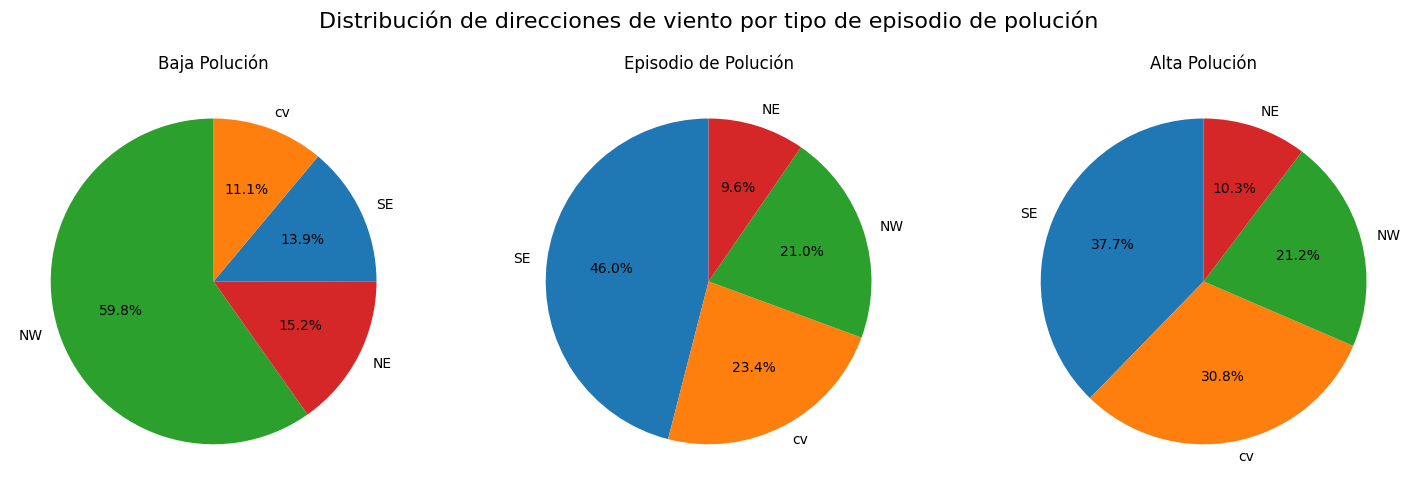

In [197]:
# Distribución de direcciones del viento por tipo de episodio
df_valid = df.dropna(subset=['cbwd', 'pm_state'])

estados_polucion = ['Baja Polución', 'Episodio de Polución', 'Alta Polución']

#Mapeo global de colores para las direcciones del viento
# Obtener todas las direcciones únicas
direcciones_unicas = df_valid['cbwd'].unique()

cmap = plt.cm.tab10
colores_direcciones = {dir_viento: cmap(i) for i, dir_viento in enumerate(direcciones_unicas)}

# Grafico de torta
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución de direcciones de viento por tipo de episodio de polución', fontsize=16)

# Iterar¿ción sobre cada estado de polución
for ax, estado in zip(axes, estados_polucion):
    datos = df_valid[df_valid['pm_state'] == estado]['cbwd'].value_counts(normalize=True) * 100
    colores_para_rebanadas = [colores_direcciones[d] for d in datos.index]
    wedges, texts, autotexts = ax.pie(datos.values, labels=datos.index, autopct='%1.1f%%',startangle=90, colors=colores_para_rebanadas)
    ax.set_title(f'{estado}')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Durante los eventos clasificados como de Baja Polución, la dirección predominante del viento corresponde al noroeste (NW). En contraste, durante los Episodios de Polución y los eventos de Alta Polución, predomina el flujo proveniente del sureste (SE). En estos últimos casos, la distribución de direcciones del viento presenta proporciones similares; sin embargo, se observa un incremento significativo en la frecuencia de condiciones de viento en calma o estacionario, en comparación con los periodos de baja polución, donde dicha condición es mínima. Este comportamiento sugiere que los estados atmosféricos caracterizados por baja velocidad del viento favorecen la acumulación de material particulado fino (PM₂.₅), al limitar la dispersión y la renovación del aire en la capa baja de la atmósfera.

Desde una perspectiva geomorfológica, la ubicación de Pekín en un entorno parcialmente rodeado por montañas tiene un papel determinante en la dinámica de dispersión de contaminantes. Hacia el noroeste (NW) se presentan elevaciones pronunciadas del terreno, asociadas a los sistemas montañosos Yan y Taihang, ubicados en la periferia de la ciudad, así como a las montañas Jundu y Xi dentro del área urbana. Esta configuración topográfica actúa como una barrera orográfica que restringe el intercambio de masas de aire. En consecuencia, cuando los vientos provienen del sureste (SE), las masas de aire contaminadas tienden a acumularse sobre la ciudad al encontrarse con las elevaciones del noroeste, generando condiciones de estancamiento atmosférico. Por el contrario, bajo vientos dominantes del noroeste, el flujo de aire se desplaza libremente hacia el sureste, una zona predominantemente plana, lo que facilita la ventilación y dispersión del PM₂.₅ fuera del valle urbano.

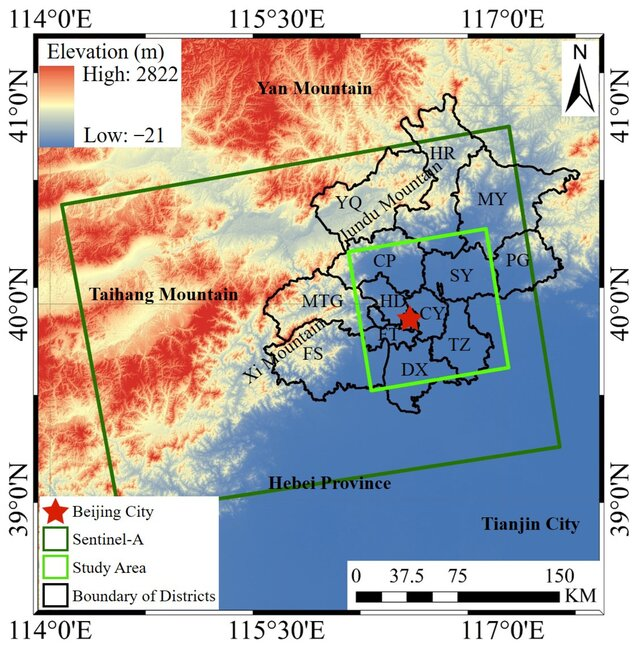

In [198]:
from IPython.display import Image
display(Image(filename='/content/drive/MyDrive/intro_cienciadatos/pekin_dem.jpg', width=600))

| Dirección del viento | Características geomorfológicas asociadas | Efecto sobre la dispersión de contaminantes | Relación con niveles de PM2.5 |
|-----------------------|-------------------------------------------|---------------------------------------------|--------------------------------|
| Noroeste (NW) | Presencia de montañas Yan, Taihang, Jundu y Xi; zonas elevadas que delimitan la ciudad por ese sector | Favorece el desplazamiento de masas de aire limpio hacia el sureste, donde el terreno es más plano | Asociada a **bajos niveles de PM2.5** y a **episodios de baja polución** |
| Sureste (SE) | Zonas planas y urbanizadas; dirección opuesta a las principales barreras montañosas | El flujo de aire desde esta dirección se ve obstaculizado por las montañas del noroeste, lo que limita la ventilación | Asociada a **altos niveles de PM2.5** y **episodios de alta polución** |
| Calma o viento estacionario | Sin dirección predominante definida | Ausencia de ventilación efectiva; favorece el estancamiento del aire | Conduce a **acumulación de contaminantes** y **picos de concentración** |

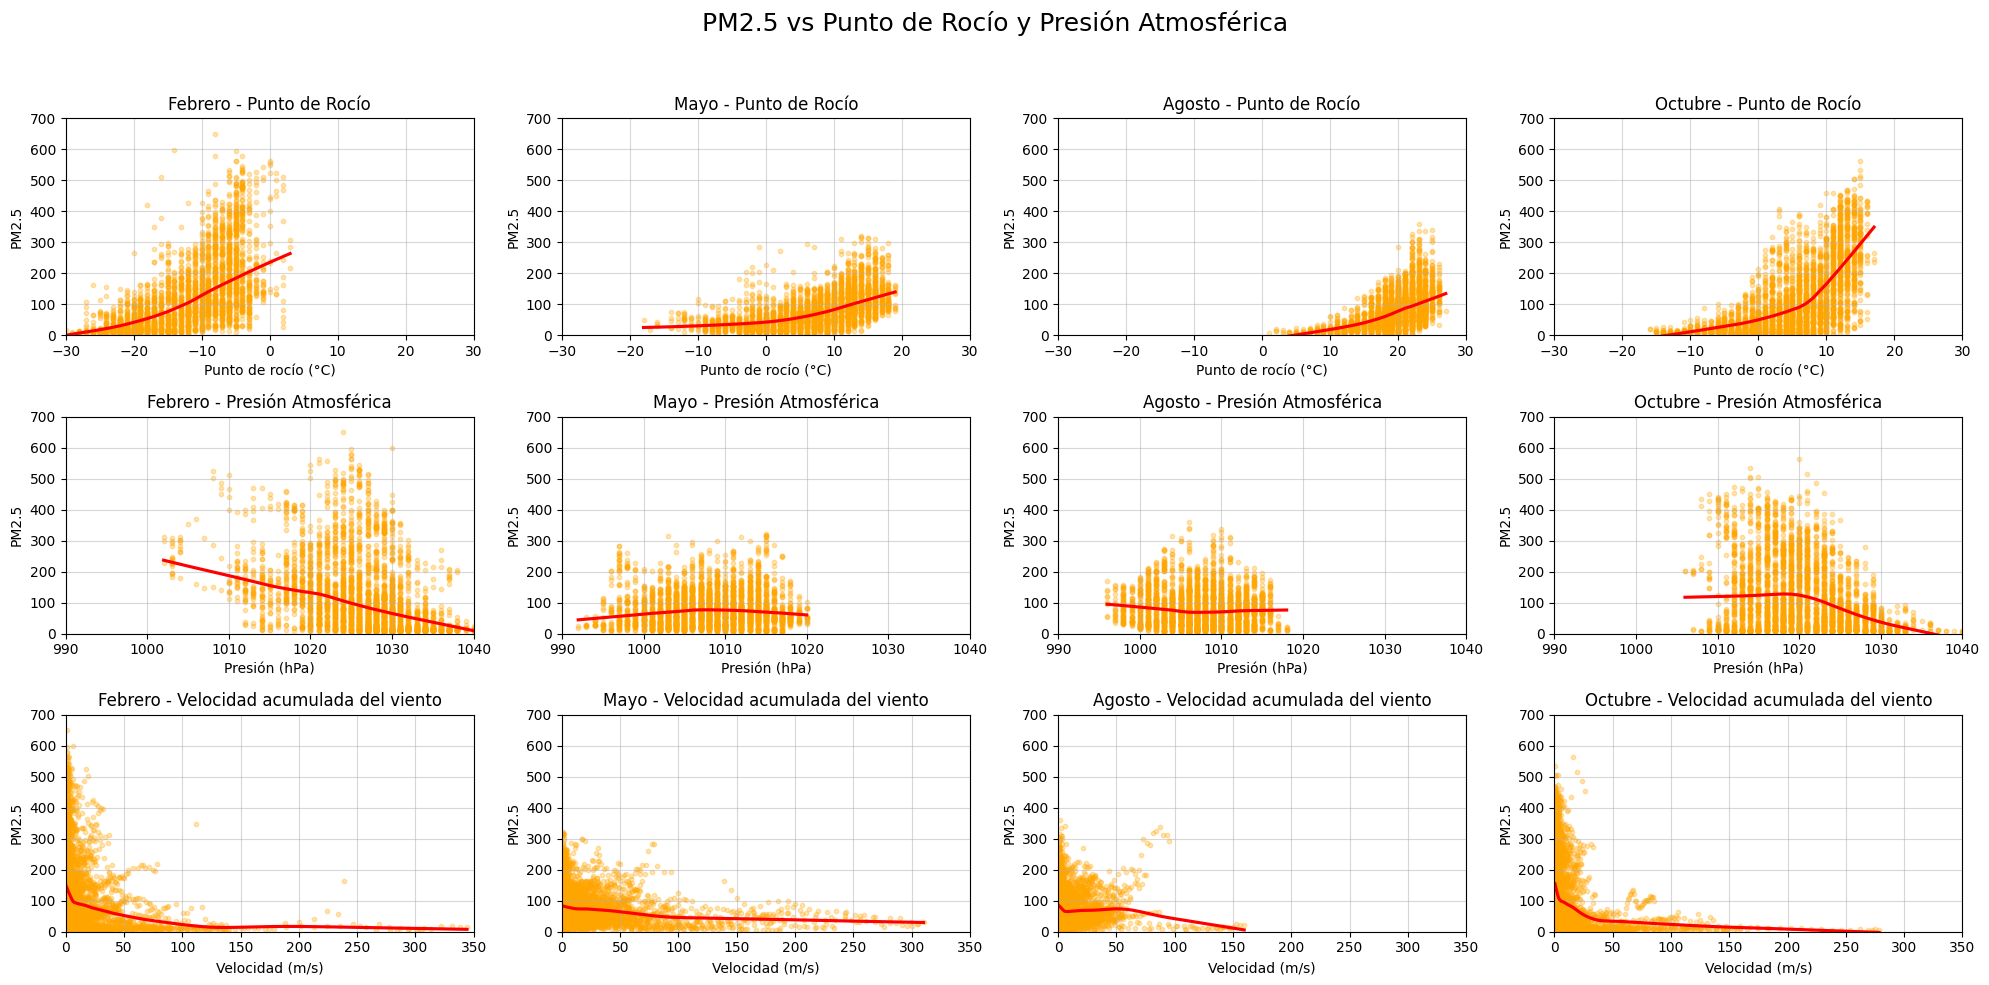

In [199]:
# Meses a graficar
meses = {2: 'Febrero', 5: 'Mayo', 8: 'Agosto', 10: 'Octubre'} #Los meses donde se evidencian picos en las concentraciones de PM 2.5

# 2 filas y 4 columnas
fig, axes = plt.subplots(3, 4, figsize=(20, 10))
fig.suptitle('PM2.5 vs Punto de Rocío y Presión Atmosférica', fontsize=18)

for i, (mes_num, mes_nombre) in enumerate(meses.items()):
    df_mes = df[df['month'] == mes_num]

    # PM2.5 vs Punto de rocío
    ax1 = axes[0, i]
    sns.regplot(data=df_mes, x='DEWP', y='pm2.5', lowess=True, scatter_kws={'color': 'orange', 'alpha': 0.3, 's': 10}, line_kws={'color': 'red'}, ax=ax1)
    ax1.set_title(f'{mes_nombre} - Punto de Rocío')
    ax1.set_xlabel('Punto de rocío (°C)')
    ax1.set_ylabel('PM2.5')
    ax1.set_xlim(-30, 30)
    ax1.set_ylim(0, 700)
    ax1.grid(True, alpha=0.5)

    # PM2.5 vs Presión Atm
    ax2 = axes[1, i]
    sns.regplot(data=df_mes, x='PRES', y='pm2.5',lowess=True, scatter_kws={'color': 'orange', 'alpha': 0.3, 's': 10}, line_kws={'color': 'red'}, ax=ax2)
    ax2.set_title(f'{mes_nombre} - Presión Atmosférica')
    ax2.set_xlabel('Presión (hPa)')
    ax2.set_ylabel('PM2.5')
    ax2.set_xlim(990, 1040)
    ax2.set_ylim(0, 700)
    ax2.grid(True, alpha=0.5)

    # PM2.5 vs Vel viento
    ax3 = axes[2, i]
    sns.regplot(data=df_mes, x='Iws', y='pm2.5',lowess=True, scatter_kws={'color': 'orange', 'alpha': 0.3, 's': 10}, line_kws={'color': 'red'}, ax=ax3)
    ax3.set_title(f'{mes_nombre} - Velocidad acumulada del viento')
    ax3.set_xlabel('Velocidad (m/s)')
    ax3.set_ylabel('PM2.5')
    ax3.set_xlim(0, 350)
    ax3.set_ylim(0, 700)
    ax3.grid(True, alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

En las gráficas, las curvas de regresión indican una tendencia ascendente de la concentración de PM₂.₅ a medida que aumenta el punto de rocío, y una tendencia considerablemente descendente a medida que aumenta la presión, excepto en mayo y agosto, donde se mantienen más estables. Una disminución del punto de rocío y un aumento de la presión suelen ir acompañados de la llegada del viento del norte, que trae aire más seco y fresco.

Esto se debe a que las masas de aire procedentes del norte y noroeste en Pekín suelen tener origen continental, con baja humedad y temperaturas reducidas. Estas condiciones generan un descenso del punto de rocío debido a la menor cantidad de vapor de agua presente en el aire. Al mismo tiempo, el enfriamiento del aire incrementa su densidad, provocando un aumento de la presión atmosférica. Dichas situaciones meteorológicas son típicas de escenarios anticiclónicos, caracterizados por subsidencia del aire y estabilidad atmosférica. Sin embargo, el flujo nortino también puede favorecer la ventilación y dispersión de contaminantes, especialmente cuando se asocia con vientos moderados, contribuyendo temporalmente a la reducción de las concentraciones de PM₂.₅.

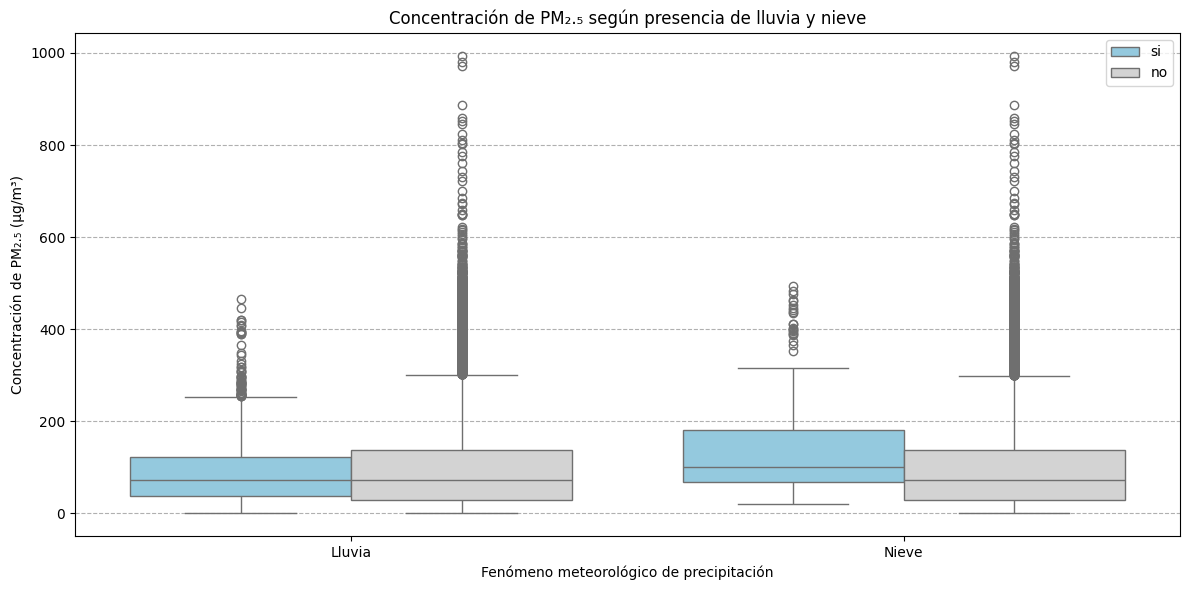

In [200]:
#Boxplots de PM2.5 según ocurrencia de precipitación
df_lluvia = df[['pm2.5', 'rain']].copy()
df_lluvia['Fenómeno'] = 'Lluvia'
df_lluvia['Estado'] = df_lluvia['rain']

df_nieve = df[['pm2.5', 'snow']].copy()
df_nieve['Fenómeno'] = 'Nieve'
df_nieve['Estado'] = df_nieve['snow']

df_comb = pd.concat([df_lluvia, df_nieve], ignore_index=True)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Fenómeno', y='pm2.5', hue='Estado', data=df_comb, order=['Lluvia', 'Nieve'], hue_order=['si', 'no'], palette={'si': 'skyblue', 'no': 'lightgray'})
plt.title('Concentración de PM₂.₅ según presencia de lluvia y nieve')
plt.ylabel('Concentración de PM₂.₅ (µg/m³)')
plt.xlabel('Fenómeno meteorológico de precipitación')
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

En cuanto a la posible relación entre las concentraciones de PM₂.₅ y la ocurrencia de precipitaciones, se observa que, en presencia de nieve, los valores de concentración de PM₂.₅ tienden a ser más altos en comparación con los periodos sin precipitación sólida. Esto podría estar asociado a las condiciones atmosféricas frías y estables típicas durante los eventos de nieve, que limitan la mezcla vertical y favorecen la acumulación de contaminantes en las capas bajas de la atmósfera.

Por otro lado, en los eventos de lluvia, el rango de concentraciones de PM₂.₅ es ligeramente menor, aunque el comportamiento general de la distribución es similar. Este patrón puede atribuirse al efecto de lavado o scavenging húmedo, mediante el cual las gotas de lluvia arrastran las partículas en suspensión, reduciendo parcialmente las concentraciones en el aire.

Finalmente, se observa un número considerablemente mayor de valores atípicos en los periodos sin precipitación, lo cual se explica por la predominancia de registros horarios sin eventos de lluvia o nieve, que abarcan la mayoría del conjunto de datos y presentan una mayor variabilidad en las concentraciones de PM₂.₅.

# <strong> 4. Detección y análisis de datos atípicos </strong>


Detectar valores atípicos en variables ambientales como el PM₂.₅ resulta más complejo que en otras series de datos debido a la alta variabilidad natural de los procesos atmosféricos, la influencia de múltiples factores físicos y antrópicos, y la naturaleza estadística particular de esta variable.

Han existido episodios severos de contaminación del aire como por ejemplo el "Airpocalypsis" en Enero de 2013 en Pekín, donde hubo valores excepcionalmente altos de PM₂.₅ con una media diaria máxima de hasta 569 µg/m³ y con concentracionas máximas 22 veces por encima de el umbral saludable recomendado por la OMS (770 µg/m³). Estos valores nos sirven como base para empezar a discriminar valores atípicos de PM₂.₅.

# Método de Rango Intercuartílico

Se usará el metodo de IQR para la detección de atípicos debido a que es un método robusto frente a sesgos y asimetrías, característica que se identifica en la distribución de PM₂.₅, la única variable que será sujeto a detección de valores atípicos con este método.

En este caso, el tipo de datos atípicos que estamos buscando estarán relacionados a errores de medición (valores por encima de los máximos registrados y publicados en bibliografía).

El límite inferior será programado en 0 µg/m³ debido a que no es posible que haya valores negativos de concentración.


Límite Superior IQR (+1.5 x IQR): 299.00 µg/m³
Total de valores atípicos altos (> 299.00 µg/m³): 1773
% de atípicos altos (> 299.00 µg/m³): 4.0457283680175244

Límite Superior IQR (+4.6 x IQR): 633.80 µg/m³
Total de valores atípicos altos (> 633.80 µg/m³): 26
% de atípicos altos (> 633.80 µg/m³): 0.05932822197882439


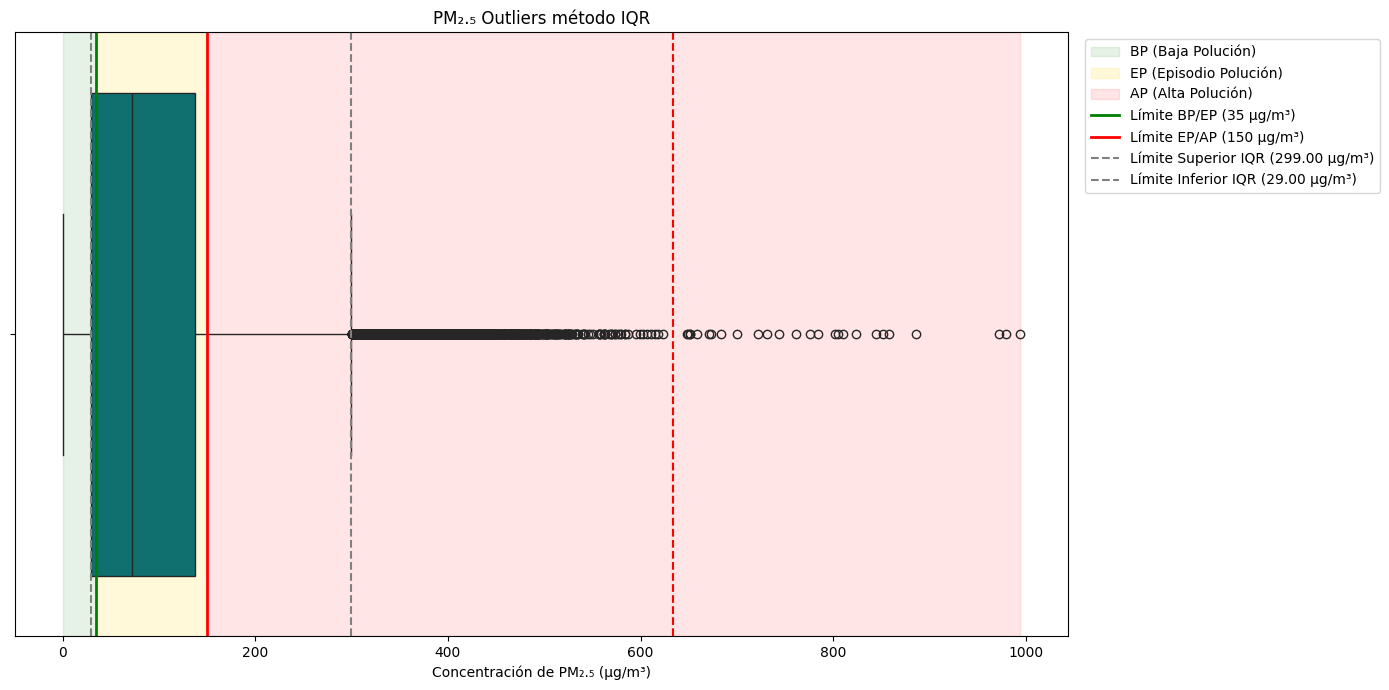

In [201]:
#Eliminar NaNs de la columna de pm 2.5
pm25_clean = df['pm2.5'].dropna()

#IQR
Q1 = pm25_clean.quantile(0.25)
Q3 = pm25_clean.quantile(0.75)
IQR = Q3 - Q1

#Límites
lim_inf = Q1 #pm2.5 no puede ser menor a 0
lim_sup = Q3 + 1.5 * IQR
lim_sup2 = Q3 + 4.6 * IQR

#Límites Categóricos
LIM_EP = 35  # Límite de Baja Polución a Episodio de Polución
LIM_AP = 150 # Límite de Episodio de Polución a Alta Polución

df['outlier_iqr'] = (df['pm2.5'] < lim_inf) | (df['pm2.5'] > lim_sup)
num_atipicos= (df['pm2.5'] > lim_sup).sum()
porcentaje_atipicos = (num_atipicos/ len(df)) * 100

num_atipicos2= (df['pm2.5'] > lim_sup2).sum()
porcentaje_atipicos2 = (num_atipicos2/ len(df)) * 100

print(f"\nLímite Superior IQR (+1.5 x IQR): {lim_sup:.2f} µg/m³")
print(f"Total de valores atípicos altos (> {lim_sup:.2f} µg/m³): {num_atipicos}")
print(f"% de atípicos altos (> {lim_sup:.2f} µg/m³): {porcentaje_atipicos}")
print(f"\nLímite Superior IQR (+4.6 x IQR): {lim_sup2:.2f} µg/m³")
print(f"Total de valores atípicos altos (> {lim_sup2:.2f} µg/m³): {num_atipicos2}")
print(f"% de atípicos altos (> {lim_sup2:.2f} µg/m³): {porcentaje_atipicos2}")


#Gráfica
plt.figure(figsize=(14, 7))
sns.boxplot(x=pm25_clean, color='teal')
plt.axvspan(0, LIM_EP, color='green', alpha=0.1, label='BP (Baja Polución)')
plt.axvspan(LIM_EP, LIM_AP, color='gold', alpha=0.15, label='EP (Episodio Polución)')
plt.axvspan(LIM_AP, pm25_clean.max(), color='red', alpha=0.1, label='AP (Alta Polución)')
plt.axvline(LIM_EP, color='green', linestyle='-', linewidth=2, label=f'Límite BP/EP ({LIM_EP:.0f} µg/m³)')
plt.axvline(LIM_AP, color='red', linestyle='-', linewidth=2, label=f'Límite EP/AP ({LIM_AP:.0f} µg/m³)')
plt.axvline(lim_sup, color='gray', linestyle='--', linewidth=1.5, label=f'Límite Superior IQR ({lim_sup:.2f} µg/m³)')
plt.axvline(lim_inf, color='gray', linestyle='--', linewidth=1.5, label=f'Límite Inferior IQR ({lim_inf:.2f} µg/m³)')
plt.axvline(lim_sup2, color='red', linestyle='--', linewidth=1.5)
plt.xlabel('Concentración de PM₂.₅ (µg/m³)')
plt.title('PM₂.₅ Outliers método IQR')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

Todos los datos detectados como atípicos se encuentran dentro del grupo de los eventos de alta polución.

Se incluyó un umbral de 4.6 × IQR, dado que existe una proporción considerable de datos altamente dispersos. Además, por encima de los 600 µg/m³ se observa una separación evidente entre dos grupos de valores, los cuales se distancian de los outliers identificados con el umbral tradicional de 1.5 × IQR. Estos últimos, a su vez, presentan una mayor agrupación interna. Teniendo en cuenta los valores máximos registrados durante el "Airpocalypsis", podemos considerar lógico que los datos encontrados por encima de este umbral sean producto de errores de medición.

# Método de Isolation Forest

Teniendo en cuenta que la frecuencia de datos es horaria durante 5 años, el volumen de datos es grande. Además, ninguna de las variables numéricas se distribuye de manera normal, porlo que el método de Isolation Forest es conveniente para reforzar la detección de datos atípicos, esta vez incluyendo relación entre las variables.

La tasa de contaminación utilizada será de 0.01 ya que los datos son algo dispersos.

In [ ]:
# Seleccionar variables numéricas
num_vars = ['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws']
df_num = df[num_vars].dropna()  # eliminar filas con NaN

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# Modelo Isolation Forest
iso = IsolationForest(contamination=0.01, n_estimators=200, random_state=42)
iso.fit(X_scaled)

# Predicciones
df_num['anomaly'] = iso.predict(X_scaled)
df_num['score'] = iso.decision_function(X_scaled)

# Agregar resultados al DataFrame original
df.loc[df_num.index, 'anomaly'] = df_num['anomaly']
df.loc[df_num.index, 'score'] = df_num['score']

print("Conteo de anomalías:")
print(df_num['anomaly'].value_counts())
print("\nProporción de outliers:", (df_num['anomaly'] == -1).mean())

# Mapear colores: azul = normal, rojo = outlier
palette = {1: 'skyblue', -1: 'red'}

sns.pairplot(data=df_num, vars=num_vars, hue='anomaly', palette=palette, diag_kind='kde', plot_kws={'alpha':0.6, 's':25, 'edgecolor':'k'})

plt.suptitle('Relaciones entre variables y detección de anomalías (Isolation Forest)', y=1.02)
plt.show()


Conteo de anomalías:
anomaly
 1    41339
-1      418
Name: count, dtype: int64

Proporción de outliers: 0.010010297674641377


En las gráficas que involucran la variable PM2.5, la presencia de datos atípicos resulta más evidente, dado que algunos valores se alejan considerablemente del conjunto principal de observaciones. No obstante, no todos los puntos identificados por el modelo deben considerarse anómalos, ya que varios se mantienen dentro de un rango aceptable que no altera significativamente el comportamiento general de la variable. Sin embargo, aquellos valores que coinciden con los detectados mediante el método del rango intercuartílico (IQR) sí pueden considerarse candidatos a ser excluidos del análisis, ya que coinciden con los puntos extremadamente alejados que se halló usando este método.

En las gráficas que relacionan las variables temperatura, punto de rocío y presión atmosférica, los valores identificados como atípicos se encuentran, en su mayoría, dentro de una nube de puntos densamente agrupada. Por ello, se considera que estos no representan verdaderas anomalías y, en consecuencia, no serán tratados como outliers.

Finalmente, el mayor número de valores detectados como atípicos se observa en las gráficas que incluyen la variable potencia del viento acumulada. Dado que esta variable representa un valor acumulativo, es probable que el algoritmo Isolation Forest identifique como anómalos aquellos casos en los que la potencia del viento alcanza valores elevados. Esto puede deberse a que los episodios en los cuales la dirección del viento se mantiene constante son menos frecuentes, generando registros poco comunes. Sin embargo, estos valores no deben eliminarse, ya que el comportamiento del viento constituye una de las variables de mayor interés dentro del presente estudio.


### Tabla resumen de detección de datos atípicos por variable

| **Variable o conjunto de variables**              | **Presencia de atípicos** | **Interpretación de los atípicos** | **Tratamiento recomendado** |
|---------------------------------------------------|----------------------------|-----------------------------------|-----------------------------|
| **PM2.5**                                         | Baja                       | Algunos valores se alejan notablemente del grupo principal; no todos afectan el comportamiento general. | Eliminar solo los que coincidan con el método IQR. |
| **Temperatura – Punto de rocío – Presión**        | Descartable                       | Los valores detectados se mantienen dentro de una nube de datos densa; no representan verdaderas anomalías. | No eliminar; considerar como parte del comportamiento natural. |
| **Potencia del viento acumulada (Cumulated Wind Power)** | Alta                   | El modelo detecta valores altos como atípicos por ser menos frecuentes; reflejan condiciones donde la dirección del viento se mantiene estable. | No eliminar; son relevantes para el estudio del comportamiento del viento. |

**Nota:** Los valores atípicos deben analizarse considerando el contexto físico y ambiental de las variables antes de decidir su exclusión del conjunto de datos.


# <strong> 5. Conclusiones </strong>

En conjunto, los resultados evidencian que las condiciones meteorológicas y la morfología del terreno influyen de manera determinante en la variabilidad espacial y temporal de las concentraciones de PM2.5 en Pekín. Los episodios de alta polución tienden a ocurrir bajo bajas temperaturas, alta presión y vientos débiles, condiciones que limitan la dispersión del material particulado debido, en parte, a las barreras orográficas que rodean la ciudad. Por el contrario, temperaturas más elevadas, humedad moderada y vientos intensos favorecen la dispersión y reducción de las concentraciones.

El análisis de outliers refuerza esta interpretación, mostrando que la variable PM2.5 presenta la mayor sensibilidad a valores extremos, mientras que la temperatura, el punto de rocío y la presión exhiben una distribución más estable. Los valores atípicos asociados a la potencia acumulada del viento corresponden a eventos meteorológicos poco frecuentes pero ambientalmente relevantes, por lo que deben conservarse para garantizar la representatividad del comportamiento atmosférico.

# <strong> 6. Referencias </strong>

U.S. Environmental Protection Agency. (s. f.). NAAQS table. Recuperado de https://www.epa.gov/criteria-air-pollutants/naaqs-table

Ferreri, J. M., Peng, R. D., Bell, M. L., Liu, Y., Li, T., & Anderson, G. B. (2018). The January 2013 Beijing “Airpocalypse” and its acute effects on emergency and outpatient visits at a Beijing hospital. Air Quality, Atmosphere & Health, 11(3), 301-309. https://doi.org/10.1007/s11869-017-0538-0

Jiang, W., Wang, W., Chen, Y., Liu, J., Tang, H., Hou, P., & Yang, Y. (2012). Quantifying driving forces of urban wetlands change in Beijing City. Journal of Geographical Sciences.


Sheng, H., Zhou, L., Huang, C., Ma, S., Xian, L., Chen, Y., & Yang, F. (2023). Surface Subsidence Characteristics and Causes in Beijing (China) before and after COVID-19 by Sentinel-1A TS-InSAR. Remote Sensing, 15(5), 1199. https://doi.org/10.3390/rs15051199